In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder 

In [2]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\Logistic Regression Projects\\Project 3 - wine quality\\winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# target variable - quality

In [7]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Barplot of quality')

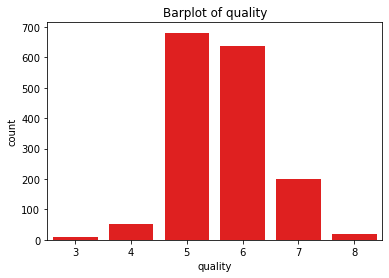

In [8]:
sns.countplot(df.quality, color = 'red')
plt.title('Barplot of quality')

# fixed acidity

In [9]:
df['fixed acidity'].value_counts()

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of fixed acidity')

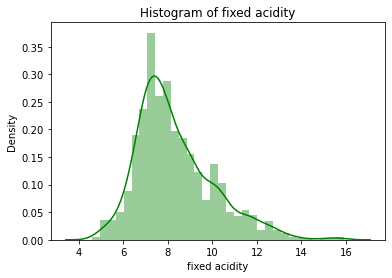

In [10]:
sns.distplot(df['fixed acidity'], color = 'green')
plt.title('Histogram of fixed acidity')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of fixed acidity')

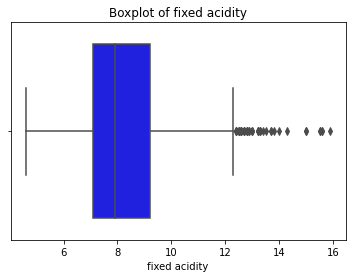

In [11]:
sns.boxplot(df['fixed acidity'], color = 'blue')
plt.title('Boxplot of fixed acidity')

In [12]:
import math
import scipy.stats as stats
from scipy import stats

In [13]:
iqr = stats.iqr(df['fixed acidity'])
iqr

2.0999999999999996

In [14]:
q3=df['fixed acidity'].quantile(0.75)
q3

9.2

In [15]:
q1=df['fixed acidity'].quantile(0.25)
q1

7.1

In [16]:
upper = q3+(1.5*iqr)
upper

12.349999999999998

In [17]:
lower = q1-(1.5*iqr)
lower

3.95

In [18]:
df['fixed acidity'] = np.where(df['fixed acidity']>upper, upper, df['fixed acidity'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of fixed acidity')

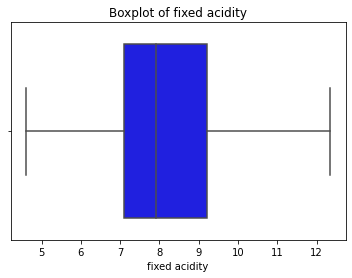

In [19]:
sns.boxplot(df['fixed acidity'], color = 'blue')
plt.title('Boxplot of fixed acidity')

# volatile acidity

In [20]:
df['volatile acidity'].value_counts()

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of volatile acidity')

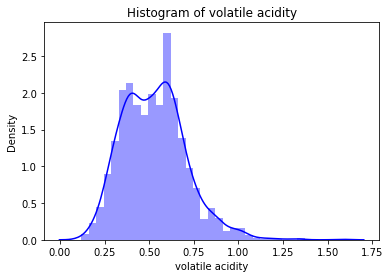

In [21]:
sns.distplot(df['volatile acidity'], color = 'blue')
plt.title('Histogram of volatile acidity')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of volatile acidity')

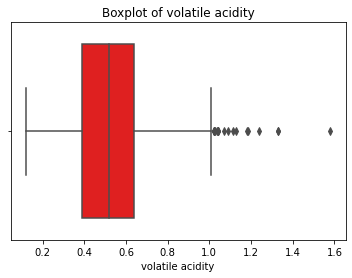

In [22]:
sns.boxplot(df['volatile acidity'], color = 'red')
plt.title('Boxplot of volatile acidity')

In [23]:
iqr = stats.iqr(df['volatile acidity'])
iqr

0.25

In [24]:
q3=df['volatile acidity'].quantile(0.75)
q3

0.64

In [25]:
q1=df['volatile acidity'].quantile(0.25)
q1

0.39

In [26]:
upper = q3+(1.5*iqr)
upper

1.0150000000000001

In [27]:
lower = q1-(1.5*iqr)
lower

0.015000000000000013

In [28]:
df['volatile acidity'] = np.where(df['volatile acidity']>upper, upper, df['volatile acidity'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of volatile acidity')

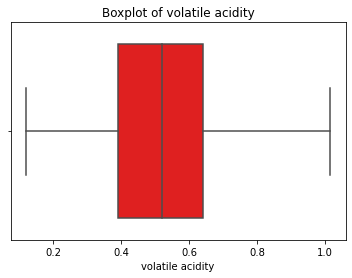

In [29]:
sns.boxplot(df['volatile acidity'], color = 'red')
plt.title('Boxplot of volatile acidity')

# citric acid

In [30]:
df['citric acid'].value_counts()

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of citric acid')

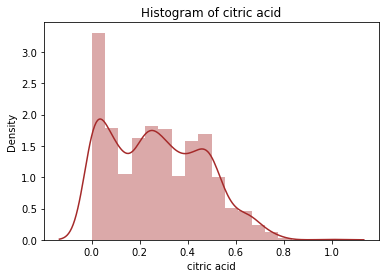

In [31]:
sns.distplot(df['citric acid'], color = 'brown')
plt.title('Histogram of citric acid')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of citric acid')

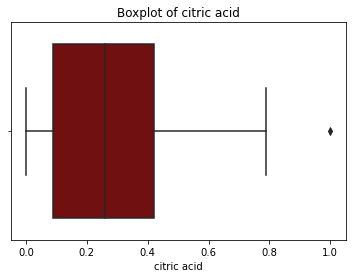

In [32]:
sns.boxplot(df['citric acid'], color = 'maroon')
plt.title('Boxplot of citric acid')

In [33]:
iqr = stats.iqr(df['citric acid'])
iqr

0.32999999999999996

In [34]:
q3=df['citric acid'].quantile(0.75)
q3

0.42

In [35]:
q1=df['citric acid'].quantile(0.25)
q1

0.09

In [36]:
upper = q3+(1.5*iqr)
upper

0.9149999999999999

In [37]:
lower = q1-(1.5*iqr)
lower

-0.4049999999999999

In [38]:
df['citric acid'] = np.where(df['citric acid']>upper, upper, df['citric acid'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of citric acid')

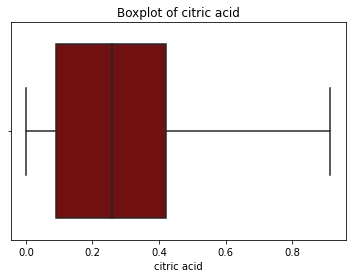

In [39]:
sns.boxplot(df['citric acid'], color = 'maroon')
plt.title('Boxplot of citric acid')

# residual sugar

In [40]:
df['residual sugar'].value_counts()

2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of residual sugar')

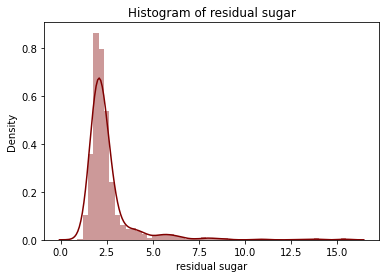

In [41]:
sns.distplot(df['residual sugar'], color = 'maroon')
plt.title('Histogram of residual sugar')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of residual sugar')

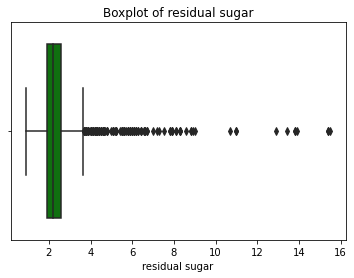

In [42]:
sns.boxplot(df['residual sugar'], color = 'green')
plt.title('Boxplot of residual sugar')

In [43]:
iqr = stats.iqr(df['residual sugar'])
iqr

0.7000000000000002

In [44]:
q3=df['residual sugar'].quantile(0.75)
q3

2.6

In [45]:
q1=df['residual sugar'].quantile(0.25)
q1

1.9

In [46]:
upper = q3+(1.5*iqr)
upper

3.6500000000000004

In [47]:
lower = q1-(1.5*iqr)
lower

0.8499999999999996

In [48]:
df['residual sugar'] = np.where(df['residual sugar']>upper, upper, df['residual sugar'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of residual sugar')

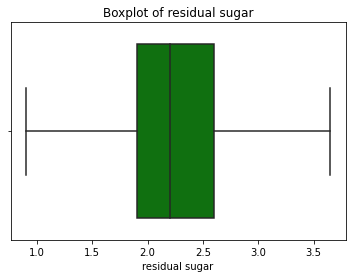

In [49]:
sns.boxplot(df['residual sugar'], color = 'green')
plt.title('Boxplot of residual sugar')

# chlorides

In [50]:
df.chlorides.value_counts()

0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of chlorides')

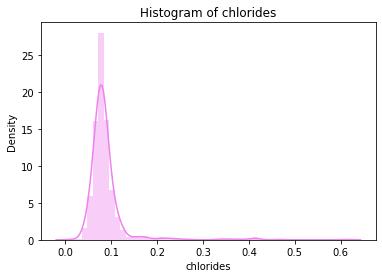

In [51]:
sns.distplot(df['chlorides'], color = 'violet')
plt.title('Histogram of chlorides')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of chlorides')

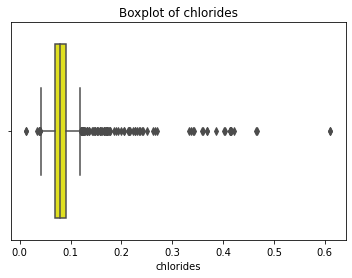

In [52]:
sns.boxplot(df['chlorides'], color = 'yellow')
plt.title('Boxplot of chlorides')

In [53]:
iqr = stats.iqr(df['chlorides'])
iqr

0.01999999999999999

In [54]:
q3=df['chlorides'].quantile(0.75)
q3

0.09

In [55]:
q1=df['chlorides'].quantile(0.25)
q1

0.07

In [56]:
upper = q3+(1.5*iqr)
upper

0.11999999999999998

In [57]:
lower = q1-(1.5*iqr)
lower

0.04000000000000002

In [58]:
df['chlorides'] = np.where(df['chlorides']<lower, lower, df['chlorides'])

In [59]:
df['chlorides'] = np.where(df['chlorides']>upper, upper, df['chlorides'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of chlorides')

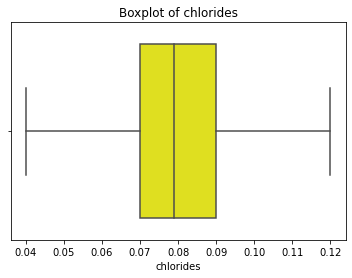

In [60]:
sns.boxplot(df['chlorides'], color = 'yellow')
plt.title('Boxplot of chlorides')

# free sulfur dioxide

In [61]:
df['free sulfur dioxide'].value_counts()

6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
4.0      41
21.0     41
19.0     39
24.0     34
26.0     32
23.0     32
20.0     30
27.0     29
25.0     24
29.0     23
28.0     23
22.0     22
32.0     22
31.0     20
34.0     18
30.0     16
35.0     15
36.0     11
33.0     11
38.0      9
41.0      7
40.0      6
39.0      5
48.0      4
51.0      4
45.0      3
1.0       3
43.0      3
42.0      3
52.0      3
37.0      3
68.0      2
55.0      2
50.0      2
37.5      2
53.0      1
72.0      1
57.0      1
47.0      1
5.5       1
2.0       1
46.0      1
54.0      1
40.5      1
66.0      1
Name: free sulfur dioxide, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of free sulfur dioxide')

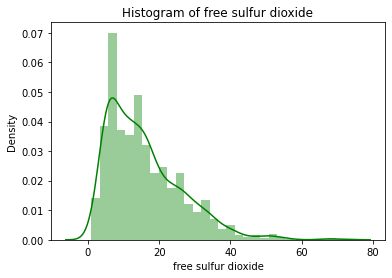

In [62]:
sns.distplot(df['free sulfur dioxide'], color = 'green')
plt.title('Histogram of free sulfur dioxide')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of free sulfur dioxide')

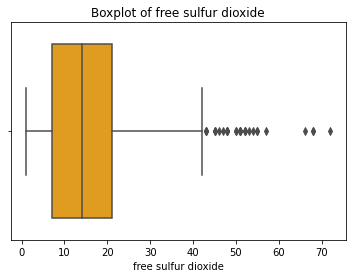

In [63]:
sns.boxplot(df['free sulfur dioxide'], color = 'orange')
plt.title('Boxplot of free sulfur dioxide')

In [64]:
iqr = stats.iqr(df['free sulfur dioxide'])
iqr

14.0

In [65]:
q3=df['free sulfur dioxide'].quantile(0.75)
q3

21.0

In [66]:
q1=df['free sulfur dioxide'].quantile(0.25)
q1

7.0

In [67]:
upper = q3+(1.5*iqr)
upper

42.0

In [68]:
lower = q1-(1.5*iqr)
lower

-14.0

In [69]:
df['free sulfur dioxide'] = np.where(df['free sulfur dioxide']>upper, upper, df['free sulfur dioxide'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of free sulfur dioxide')

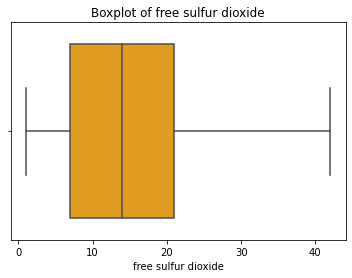

In [70]:
sns.boxplot(df['free sulfur dioxide'], color = 'orange')
plt.title('Boxplot of free sulfur dioxide')

# total sulfur dioxide

In [71]:
df['total sulfur dioxide'].value_counts()

28.0     43
24.0     36
15.0     35
18.0     35
23.0     34
         ..
139.0     1
149.0     1
152.0     1
155.0     1
165.0     1
Name: total sulfur dioxide, Length: 144, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of total sulfur dioxide')

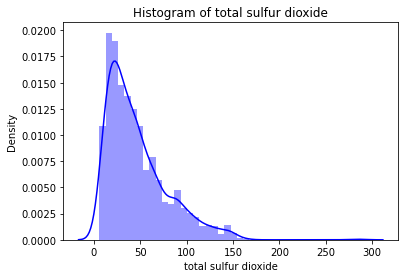

In [72]:
sns.distplot(df['total sulfur dioxide'], color = 'blue')
plt.title('Histogram of total sulfur dioxide')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of total sulfur dioxide')

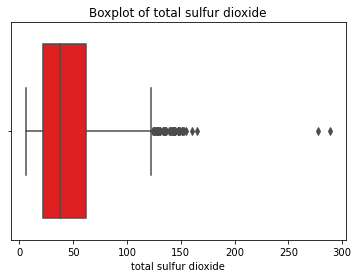

In [73]:
sns.boxplot(df['total sulfur dioxide'], color = 'red')
plt.title('Boxplot of total sulfur dioxide')

In [74]:
iqr = stats.iqr(df['total sulfur dioxide'])
iqr

40.0

In [75]:
q3=df['total sulfur dioxide'].quantile(0.75)
q3

62.0

In [76]:
q1=df['total sulfur dioxide'].quantile(0.25)
q1

22.0

In [77]:
upper = q3+(1.5*iqr)
upper

122.0

In [78]:
lower = q1-(1.5*iqr)
lower

-38.0

In [79]:
df['total sulfur dioxide'] = np.where(df['total sulfur dioxide']>upper, upper, df['total sulfur dioxide'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of total sulfur dioxide')

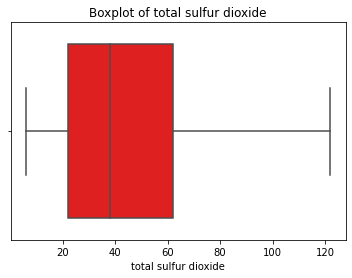

In [80]:
sns.boxplot(df['total sulfur dioxide'], color = 'red')
plt.title('Boxplot of total sulfur dioxide')

# density

In [81]:
df.density.value_counts()

0.99720    36
0.99680    35
0.99760    35
0.99800    29
0.99620    28
           ..
0.99684     1
0.99764     1
0.99473     1
0.99320     1
0.99651     1
Name: density, Length: 436, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of density')

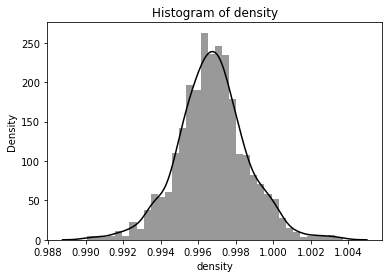

In [82]:
sns.distplot(df['density'], color = 'black')
plt.title('Histogram of density')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of density')

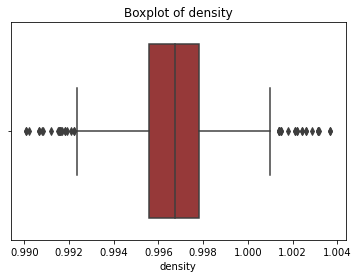

In [83]:
sns.boxplot(df['density'], color = 'brown')
plt.title('Boxplot of density')

In [84]:
iqr = stats.iqr(df['density'])
iqr

0.002234999999999987

In [85]:
q3=df['density'].quantile(0.75)
q3

0.997835

In [86]:
q1=df['density'].quantile(0.25)
q1

0.9956

In [87]:
upper = q3+(1.5*iqr)
upper

1.0011875

In [88]:
lower = q1-(1.5*iqr)
lower

0.9922475000000001

In [89]:
df['density'] = np.where(df['density']<lower, lower, df['density'])

In [90]:
df['density'] = np.where(df['density']>upper, upper, df['density'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of density')

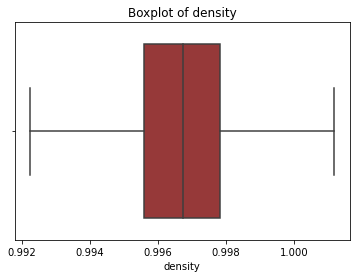

In [91]:
sns.boxplot(df['density'], color = 'brown')
plt.title('Boxplot of density')

# pH

In [92]:
df.pH.value_counts()

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of pH')

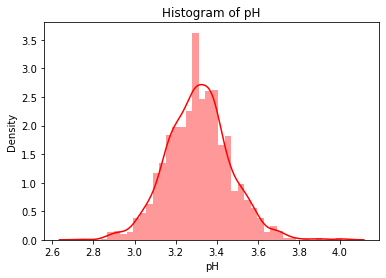

In [93]:
sns.distplot(df['pH'], color = 'red')
plt.title('Histogram of pH')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of pH')

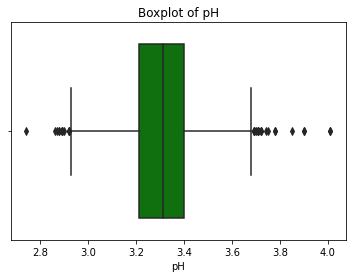

In [94]:
sns.boxplot(df['pH'], color = 'green')
plt.title('Boxplot of pH')

In [95]:
iqr = stats.iqr(df['pH'])
iqr

0.18999999999999995

In [96]:
q3=df['pH'].quantile(0.75)
q3

3.4

In [97]:
q1=df['pH'].quantile(0.25)
q1

3.21

In [98]:
upper = q3+(1.5*iqr)
upper

3.6849999999999996

In [99]:
lower = q1-(1.5*iqr)
lower

2.925

In [100]:
df['pH'] = np.where(df['pH']<lower, lower, df['pH'])

In [101]:
df['pH'] = np.where(df['pH']>upper, upper, df['pH'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of pH')

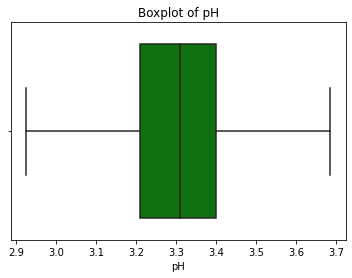

In [102]:
sns.boxplot(df['pH'], color = 'green')
plt.title('Boxplot of pH')

# sulphates

In [103]:
df.sulphates.value_counts()

0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.00     1
1.59     1
0.33     1
1.26     1
1.01     1
Name: sulphates, Length: 96, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of sulphates')

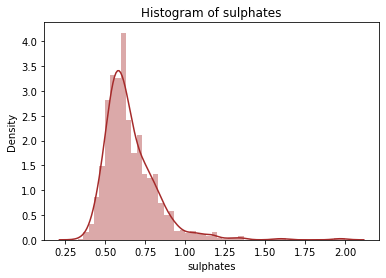

In [104]:
sns.distplot(df['sulphates'], color = 'brown')
plt.title('Histogram of sulphates')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of sulphates')

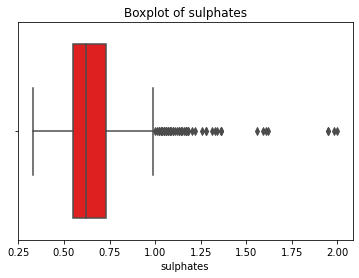

In [105]:
sns.boxplot(df['sulphates'], color = 'red')
plt.title('Boxplot of sulphates')

In [106]:
iqr = stats.iqr(df['sulphates'])
iqr

0.17999999999999994

In [107]:
q3=df['sulphates'].quantile(0.75)
q3

0.73

In [108]:
q1=df['sulphates'].quantile(0.25)
q1

0.55

In [109]:
upper = q3+(1.5*iqr)
upper

0.9999999999999999

In [110]:
lower = q1-(1.5*iqr)
lower

0.28000000000000014

In [111]:
df['sulphates'] = np.where(df['sulphates']>upper, upper, df['sulphates'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of sulphates')

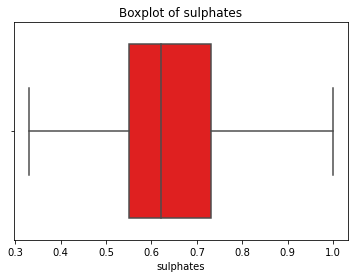

In [112]:
sns.boxplot(df['sulphates'], color = 'red')
plt.title('Boxplot of sulphates')

# alcohol

In [113]:
df.alcohol.value_counts()

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: alcohol, Length: 65, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of alcohol')

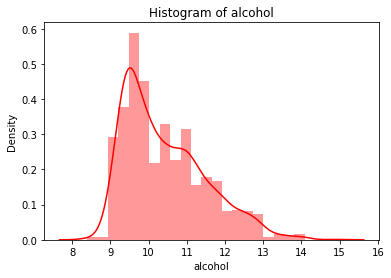

In [114]:
sns.distplot(df['alcohol'], color = 'red')
plt.title('Histogram of alcohol')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of alcohol')

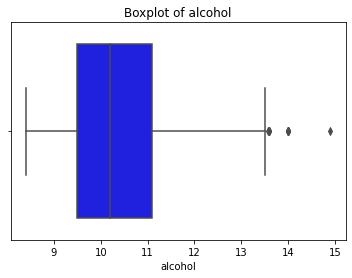

In [115]:
sns.boxplot(df['alcohol'], color = 'blue')
plt.title('Boxplot of alcohol')

In [116]:
iqr = stats.iqr(df['alcohol'])
iqr

1.5999999999999996

In [117]:
q3=df['alcohol'].quantile(0.75)
q3

11.1

In [118]:
q1=df['alcohol'].quantile(0.25)
q1

9.5

In [119]:
upper = q3+(1.5*iqr)
upper

13.5

In [120]:
lower = q1-(1.5*iqr)
lower

7.1000000000000005

In [121]:
df['alcohol'] = np.where(df['alcohol']>upper, upper, df['alcohol'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of alcohol')

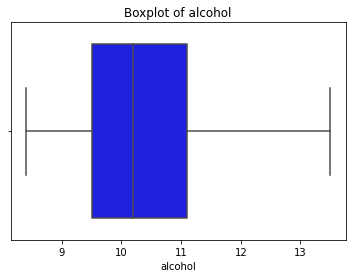

In [122]:
sns.boxplot(df['alcohol'], color = 'blue')
plt.title('Boxplot of alcohol')

In [123]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [124]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [125]:
x = df.loc[:, df.columns != 'quality']
y = df.loc[:, df.columns == 'quality']

In [126]:
y.value_counts()

quality
5          681
6          638
7          199
4           53
8           18
3           10
dtype: int64

In [127]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

# Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [146]:
from sklearn.metrics import accuracy_score

In [147]:
x, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                            n_redundant=0, n_classes=3, random_state=42)

In [149]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [152]:
rf.fit(xtrain, ytrain)

C:\Users\hp\AppData\Local\Temp\ipykernel_5668\9334975.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain, ytrain)


RandomForestClassifier(random_state=42)

In [154]:
y_pred = rf.predict(xtest)

In [155]:
accuracy = accuracy_score(ytest, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 72.19%


# Decision Tree

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [158]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                            n_redundant=0, n_classes=3, random_state=42)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
dt = DecisionTreeClassifier(random_state=42)

In [161]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [162]:
y_pred = dt.predict(X_test)

In [163]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 76.50%


# SVM

In [164]:
from sklearn.svm import SVC

In [165]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                            n_redundant=0, n_classes=3, random_state=42)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
svm = SVC(random_state=42)

In [168]:
svm.fit(X_train, y_train)

SVC(random_state=42)

In [169]:
y_pred = svm.predict(X_test)

In [170]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 85.50%


# KNN

In [171]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                            n_redundant=0, n_classes=3, random_state=42)


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
knn = KNeighborsClassifier(n_neighbors=5)

In [175]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [176]:
y_pred = knn.predict(X_test)

In [177]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 80.00%
